### Data information

Dataset has the following attributes:

- type: Event type
- duration:  Duration of the event, if it is a fixation, then it is the fixation duration
- sac_amplitude: Amplitude of the eye saccades
- sac_endpos_x: `x coordinate` of saccades end position 
- sac_endpos_y: `y coordinate` of saccades end position
- sac_startpos_x: `x coordinate` of saccades start position
- sac_startpos_y: `y coordinate` of saccades start position
- sac_vmax: Maximal velocity of saccade
- fix_avgpos_x: Average `x coordinate` position 
- fix_avgpos_y: Average `y coordinate` position
- fix_avgpupilsize: Average pupil size of the eye
- overlapping: Whether there are two bounding boxes that are overlapping (e.g. a face, being partially occluded by another head)
- fix_samebox: Whether the current fixation is within the same bounding box (e.g. same face) as the previous one.
- id: Subject ID
- picID: Picture ID
- trialnum: Trial Number
- fix_type: Type of the fixation.
- onset: Event onset time.


### Task Summary
- Analyse dataset and find relation between variables if any

In [124]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/sub-45/eeg/sub-45_task-WLFO_events.tsv', sep='\t')
df = df.rename(str.strip, axis='columns')

df.head(2)

,type,duration,sac_amplitude,sac_endpos_x,sac_endpos_y,sac_startpos_x,sac_startpos_y,sac_vmax,fix_avgpos_x,fix_avgpos_y,fix_avgpupilsize,overlapping,fix_samebox,id,picID,trialnum,fix_type,onset
0,__,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.001953
1,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,43.265625


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9279 entries, 0 to 9278
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              9279 non-null   object 
 1   duration          9279 non-null   float64
 2   sac_amplitude     8228 non-null   float64
 3   sac_endpos_x      8228 non-null   float64
 4   sac_endpos_y      8228 non-null   float64
 5   sac_startpos_x    8228 non-null   float64
 6   sac_startpos_y    8228 non-null   float64
 7   sac_vmax          6778 non-null   float64
 8   fix_avgpos_x      3683 non-null   float64
 9   fix_avgpos_y      3683 non-null   float64
 10  fix_avgpupilsize  3683 non-null   float64
 11  overlapping       9279 non-null   int64  
 12  fix_samebox       4734 non-null   float64
 13  id                171 non-null    float64
 14  picID             171 non-null    float64
 15  trialnum          171 non-null    float64
 16  fix_type          2461 non-null   object 


we observe that: 
- 'type' and 'fix_type' are categorial values.
- duration, sac_amplitude, sac_endpos_x, sac_endpos_y, sac_startpos_x, sac_startpos_y, sac_vmax, fix_avgpos_x, fix_avgpos_y, fix_avgpupilsize, overlapping, fix_samebox, id, picID, trailnum, onset are numerical attributes
 

### Understanding categorical variables 

In [126]:
df['fix_type'].unique()

array([nan, 'NonetoNone', 'NonetoHF', 'HFtoNone', 'HFtoHF', 'NonetoOS',
       'OStoNone', 'NonetoHH', 'HHtoNone', 'OLtoNone', 'HFtoNH',
       'NHtoNone', 'NonetoNH', 'OStoOS', 'NHtoNH', 'NHtoHF', 'OLtoHF',
       'HFtoHH', 'HHtoHH', 'HHtoHF', 'NonetoOL', 'OStoHF', 'OStoNH',
       'OStoHH', 'HFtoOS'], dtype=object)

### Types:
- NonetoNone:Background to Background
- NonetoHF - HFtoNone: Background to Human Face - Human Face to Backgound
- HFtoHF: Human Face to Human Face
- NonetoOS - OStoNone: Background to Outside the image - Outside to background
- NonetoHH - HHToNone: Backgound to human head, in difference to human face
- OLtoNone: Overlapping bounding box, no unique attribution possible
- HFtoNH: Human Face to non human head (e.g. cardboard, or mannequin)
- NHtoNone: Non human head (e.g. cardboard, or mannequin) to Backgound
- OStoOS: Outside stimulus to outside stimulus
- NHtoNH: Non human head (e.g. cardboard, or mannequin) to Non human head (e.g. cardboard, or mannequin)
- OLtoHF: Overlapping bounding box to Human Face?
- HFtoHH: Human Face to Human Head
- HHtoHH: Human Head to Human Head
- NonetoOL: Backgound to Overlapping bounding box
- OstoHF - OStoNH: Self decoded
- OStoHH - HFtoOS: Self decoded

In [127]:
df['type'].unique()

array(['__', '200', 'blink', 'stimulus', 'fixation', 'saccade',
       'blinkFix', '180', '212', '213', '214', '255'], dtype=object)

### Triggers
- 213, 214, 215 : Recalibration settings for eye tracker
- 180: End of stimulus  

## Saliency Map

In [128]:
df['picID'].unique()[1:]

array([113.,  79., 105.,   7.,  60.,  81.,  50., 121., 115.,  28., 114.,
         4., 110.,  45.,  70., 165.,  92., 138.,  40.,  32.,  22., 128.,
       152.,   9.,  48., 118.,  69., 123., 149.,  80.,  74.,   8., 167.,
        52.,  51., 117.,  67., 153.,  62.,  30., 108.,  23., 155., 119.,
        95.,  25.,  36.,  56.,  39.,  89.,  55.,   3.,  16.,  20.,  68.,
       102.,  75., 170., 139.,  42., 163., 137.,  63., 162., 122., 164.,
       116., 136., 124.,  26., 141., 157.,  59.,  34., 120., 112., 147.,
       130., 151., 148.,  98.,  19.,  61.,   5.,  82., 169.,  44., 106.,
        37.,  66.,  14.,   6., 109., 146.,  24.,  71.,  21., 160., 101.,
       129., 171.,   2.,  38.,  84., 103., 104., 158., 140.,  33., 145.,
        93., 132.,  76., 156.,  15.,  10., 150.,  64.,  12., 135.,  54.,
       100.,  18.,  58.,  91.,  31.,  99.,  65.,  41.,  88., 159.,  78.,
        94., 125.,  47., 142., 134.,  86., 133.,  27., 161.,  43.,  35.,
        83.,  97.,  49.,  11., 143., 126., 154.,  7

In [129]:
df_pic = df.loc[df['picID'].isin(df['picID'].unique()[1:])]
idx = df_pic.index.values
images_df = [ df.iloc[np.arange(idx[id-1], idx[id])] for id in range( 1,len(df['picID'].unique()[1:]))]

In [130]:
def GaussianMask(sizex,sizey, sigma=33, center=None,fix=1):
    x = np.arange(0, sizex, 1, float)
    y = np.arange(0, sizey, 1, float)
    x, y = np.meshgrid(x,y)
    
    if center is None:
        x0 = sizex // 2
        y0 = sizey // 2
    else:
        if np.isnan(center[0])==False and np.isnan(center[1])==False:            
            x0 = center[0]
            y0 = center[1]        
        else:
            return np.zeros((sizey,sizex))

    return fix*np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / sigma**2)

In [131]:
def GenerateSaliencyMap(width = 3840, height=2160, df = None):
    
    size = max(width, height)
    heatmap = np.zeros((size, size), np.float32)

    X = df["fix_avgpos_x"].tolist()
    Y = df['fix_avgpos_y'].tolist()
    sigma = [ x*10 if x > 0 else 0.5 for x in df['sac_amplitude']]
    psize = df['fix_avgpupilsize'].tolist()

    for i in range(len(X)):
        heatmap += GaussianMask(size, size, sigma[i], (X[i],Y[i]), psize[i])
    heatmap = heatmap[:height, :width]    
    heatmap = heatmap/np.amax(heatmap)
    heatmap = heatmap*255
    heatmap = heatmap.astype("uint8")
    return heatmap
    

In [132]:
len(images_df)

170

In [133]:
sal_imgs = [ GenerateSaliencyMap(df=df) for df in images_df[:10]]

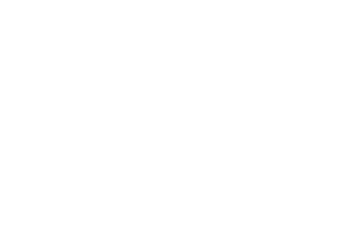

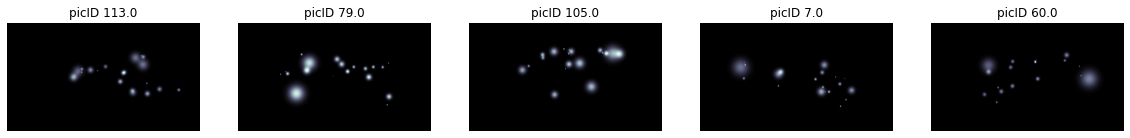

In [141]:
import matplotlib.pyplot as plt
plt.axis('off')
fig = plt.figure(figsize=(20, 20))

for i in range(1, len(sal_imgs) + 1):
    fig.add_subplot(2, 5, i)
    image_id = images_df[i-1]['picID'].dropna().to_list()[0]
    plt.gca().set_title('picID {}'.format(image_id))
    plt.axis('off')
    plt.imshow(sal_imgs[i-1], cmap='bone')
plt.savefig('output.png')

In [ ]:
# df = df.loc[df['type'] == 'fixation']

`Null Values` in the dataset

In [ ]:
df.isnull().sum()

type                   0
duration               0
sac_amplitude       1051
sac_endpos_x        1051
sac_endpos_y        1051
sac_startpos_x      1051
sac_startpos_y      1051
sac_vmax            2501
fix_avgpos_x        5596
fix_avgpos_y        5596
fix_avgpupilsize    5596
overlapping            0
fix_samebox         4545
id                  9108
picID               9108
trialnum            9108
fix_type            6818
onset                  0
dtype: int64

# Insights on distribution 
Plotting individual attributes

In [ ]:
df.describe()

,duration,sac_amplitude,sac_endpos_x,sac_endpos_y,sac_startpos_x,sac_startpos_y,sac_vmax,fix_avgpos_x,fix_avgpos_y,fix_avgpupilsize,overlapping,fix_samebox,id,picID,trialnum,onset
count,9279.000000,8.228000e+03,8228.000000,8228.000000,8228.000000,8228.000000,6778.000000,3683.000000,3683.000000,3683.000000,9279.000000,4734.000000,171.0,171.000000,171.000000,9279.000000
mean,0.174434,7.382839e+03,1869.303683,962.230421,1867.923748,959.980177,193.220271,1691.337958,844.414635,188.400489,0.000754,0.065906,45.0,86.000000,86.000000,1456.682525
std,0.801564,1.180972e+05,805.722577,396.942048,790.067125,393.420906,121.568228,964.729238,461.817675,100.454462,0.027457,0.248144,0.0,49.507575,49.507575,860.944280
min,0.000000,0.000000e+00,0.000000,-669.500000,0.000000,-1124.300000,0.000000,0.000000,-13.800000,0.000000,0.000000,0.000000,45.0,1.000000,1.000000,0.001953
25%,0.011000,1.150000e+00,1410.000000,786.450000,1443.000000,788.225000,94.000000,1154.900000,677.000000,159.000000,0.000000,0.000000,45.0,43.500000,43.500000,663.708008
50%,0.039500,3.385000e+00,1958.800000,1012.300000,1941.900000,1009.000000,180.000000,1869.000000,924.800000,210.000000,0.000000,0.000000,45.0,86.000000,86.000000,1413.116211
75%,0.101000,8.820000e+00,2479.350000,1200.300000,2454.075000,1181.300000,294.000000,2478.300000,1157.750000,254.000000,0.000000,0.000000,45.0,128.500000,128.500000,2325.609375
max,6.000000,2.000000e+06,4555.000000,4119.800000,4551.800000,4146.000000,893.000000,4507.000000,2427.500000,436.000000,1.000000,1.000000,45.0,171.000000,171.000000,2877.192383


In [ ]:
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

Define Plotting functions

In [ ]:
def Plot_dis(text):
  f= plt.figure(figsize=(21,5))
  
  ax=f.add_subplot(131)
  sns.distplot(df[text],color='b',ax=ax)
  ax.set_title('Distribution of {}'.format(text))

  ax=f.add_subplot(132)
  sns.distplot(df[(df.fix_type == 'NonetoNone')][text], color='g',ax=ax)
  ax.set_title('Distribution of {} for Background-Background'.format(text))
  
  ax=f.add_subplot(133)
  sns.distplot(df[(df.fix_type == 'NonetoHF') & (df.fix_type == 'HFtoNone')][text],color='c',ax=ax)
  ax.set_title('Distribution of {} for Background-HumanFace and vice-versa'.format(text))

  f1= plt.figure(figsize=(13,5))
  
  ax=f1.add_subplot(121)
  sns.distplot(df[(df.fix_type == 'HFtoHF')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for HumanFace-HumanFace'.format(text))

  ax=f1.add_subplot(122)
  sns.distplot(df[(df.fix_type == 'HFtoOS') & (df.fix_type == 'OStoHF')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for HumanFace-Outside and vice versa'.format(text))

In [ ]:
def Plot_box(text):
  fig, axes = plt.subplots(figsize=(25, 15))
  fig.suptitle('Box plot of {}'.format(text))
  sns.boxplot(ax=axes, data=df, y=text, x='fix_type')

In [ ]:
def Plot_scat(parameter1, parameter2, var1, var2, data=df):
  f= plt.figure(figsize=(25,5))
  ax=f.add_subplot(121)
  sns.scatterplot(x=parameter1,y=parameter2,hue=var1,data=data,ax=ax)
  ax.set_title('Relationship between {} and {} in function of {}'.format(parameter1,parameter2,var1))
  
  ax=f.add_subplot(122)
  sns.scatterplot(x=parameter1, y=parameter2,hue=var2,data=data,ax=ax)
  ax.set_title('Relationship between {} and {} in function of {}'.format(parameter1,parameter2,var2))

In [ ]:
Plot_dis('sac_amplitude')

It appears that we mostly have right skewed distribution and, 
- People are are spending more time in background to background fixation which seems strange! Normally we have tendency to look foreground objects in the image.
- People are are spending more time doing human to human fixation which seems okay. This supports the hypothesis that we have tendency to look foreground objects in the image.

Futhermore, we can see that most test subjects are either looking/exploring the image background and then the image foreground -- and we don't have a significant effect at the boundary i.e. between image foreground and background. It is like we are segmenting the image and looking at individual pieces.

In [ ]:
Plot_dis('onset')

It looks like the onset distribution is somewhat periodic with peaks at 500, 1500, 2500. 

Also, at the peak or at the middle of a period, the subjects have higher tendency of looking at the background of the image. 

In [ ]:
# Plot_box('sac_amplitude')

### Plotting scatter plots for eye fixations

In [ ]:
Plot_scat('sac_startpos_x', 'sac_startpos_y', 'sac_amplitude', 'onset', data=df)

In [ ]:
Plot_scat('fix_avgpos_x', 'fix_avgpos_y', 'sac_amplitude', 'onset')

In [ ]:
Plot_scat('fix_avgpos_x', 'fix_avgpos_y', 'sac_vmax', 'fix_avgpupilsize')

## Finding Correlation

In [ ]:
correlation = df[['duration', 'sac_amplitude', 'sac_endpos_x', 'sac_endpos_y', 'sac_startpos_x', 'sac_startpos_y', 'sac_vmax', 'fix_avgpos_x', 'fix_avgpos_y', 'fix_avgpupilsize', 'overlapping', 'fix_samebox', 'onset']].corr()

fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(correlation, annot=True, cmap='Greens', ax=ax)
plt.title('Correlation between numerical parameters')

It appears that `sac_amplitude` have strong correlation with `sac_vmax, fix_avgpos_x, fix_avgpos_y, fix_avgpupilsize`

In [ ]:
sns.catplot(x='duration', kind='count', hue='type', data=df, height=8.27, aspect=20/5)

In [ ]:
sns.catplot(kind='count', x='type',data=df, height=8.27, aspect=20/5)

In [ ]:
sns.catplot(x='fix_type',kind='count',hue='type',data=df, aspect=20/5)

In [ ]:
# sns.jointplot(x='onset',y='sac_amplitude',data=df)

In [ ]:
# sns.lmplot(y='sac_amplitude',x='onset',hue='fix_type',col='type',data=df)